In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_29465/357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_29465/357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Metal device set to: Apple M1


2022-05-24 15:10:38.089910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 15:10:38.090198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [7]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=10)

2022-05-24 15:10:44.422130: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-24 15:10:44.565927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
943/943 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.7926

2022-05-24 15:10:51.866308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 9s 7ms/step - loss: 0.4278 - accuracy: 0.7926 - val_loss: 0.3950 - val_accuracy: 0.7919
Epoch 2/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3764 - accuracy: 0.8108 - val_loss: 0.3880 - val_accuracy: 0.7968
Epoch 3/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3741 - accuracy: 0.8133 - val_loss: 0.3634 - val_accuracy: 0.8331
Epoch 4/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3706 - accuracy: 0.8150 - val_loss: 0.3674 - val_accuracy: 0.8135
Epoch 5/10
943/943 [==============================] - 7s 8ms/step - loss: 0.3710 - accuracy: 0.8132 - val_loss: 0.3765 - val_accuracy: 0.8048
Epoch 6/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3694 - accuracy: 0.8149 - val_loss: 0.3675 - val_accuracy: 0.8116
Epoch 7/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3690 - accuracy: 0.8145 - val_loss: 0.3876 - val_accuracy: 0.7938
Epoch 8/10
943/94

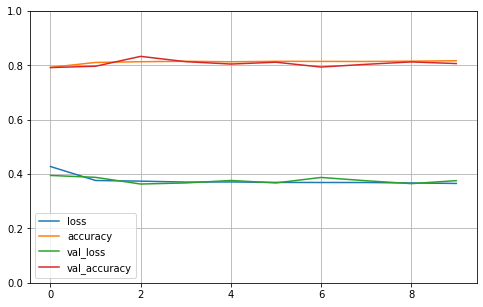

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 3ms/step - loss: 0.3758 - accuracy: 0.8066


[0.3758235573768616, 0.8066401481628418]

In [11]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") )

2022-05-24 15:12:45.580885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.8066401062416999

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

Activation function:  sigmoid 


Epoch 1/10
 18/943 [..............................] - ETA: 5s - loss: 0.5652 - accuracy: 0.7552

2022-05-24 15:16:00.826997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/943 [============================>.] - ETA: 0s - loss: 0.3764 - accuracy: 0.8248

2022-05-24 15:16:06.118084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.3759 - accuracy: 0.8250 - val_loss: 0.3412 - val_accuracy: 0.8449
Epoch 2/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3353 - accuracy: 0.8451 - val_loss: 0.3334 - val_accuracy: 0.8444
Epoch 3/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3287 - accuracy: 0.8487 - val_loss: 0.3276 - val_accuracy: 0.8458
Epoch 4/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3250 - accuracy: 0.8478 - val_loss: 0.3270 - val_accuracy: 0.8487
Epoch 5/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3232 - accuracy: 0.8493 - val_loss: 0.3236 - val_accuracy: 0.8490
Epoch 6/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3213 - accuracy: 0.8492 - val_loss: 0.3236 - val_accuracy: 0.8481
Epoch 7/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3198 - accuracy: 0.8502 - val_loss: 0.3240 - val_accuracy: 0.8483
Epoch 8/10
943/94

2022-05-24 15:17:07.426282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.6958831341301461


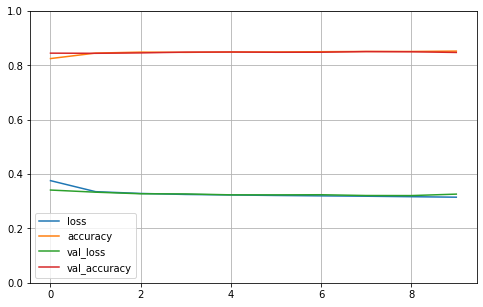

Activation function:  tanh 


Epoch 1/10
  1/943 [..............................] - ETA: 4:05 - loss: 0.9058 - accuracy: 0.3125

2022-05-24 15:17:08.454157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.3472 - accuracy: 0.8361

2022-05-24 15:17:14.063577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.3472 - accuracy: 0.8361 - val_loss: 0.3326 - val_accuracy: 0.8461
Epoch 2/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3217 - accuracy: 0.8503 - val_loss: 0.3243 - val_accuracy: 0.8477
Epoch 3/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3149 - accuracy: 0.8531 - val_loss: 0.3227 - val_accuracy: 0.8482
Epoch 4/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3114 - accuracy: 0.8542 - val_loss: 0.3204 - val_accuracy: 0.8502
Epoch 5/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3067 - accuracy: 0.8582 - val_loss: 0.3183 - val_accuracy: 0.8521
Epoch 6/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3037 - accuracy: 0.8591 - val_loss: 0.3190 - val_accuracy: 0.8503
Epoch 7/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3008 - accuracy: 0.8595 - val_loss: 0.3215 - val_accuracy: 0.8504
Epoch 8/10
943/94

2022-05-24 15:18:15.407363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.7596945551128818


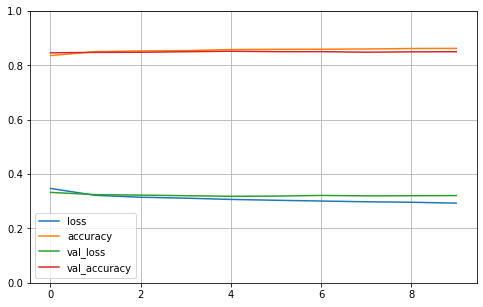

Activation function:  relu 


Epoch 1/10
  1/943 [..............................] - ETA: 3:54 - loss: 0.7282 - accuracy: 0.3750

2022-05-24 15:18:16.357604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.3451 - accuracy: 0.8354

2022-05-24 15:18:21.718937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.3451 - accuracy: 0.8354 - val_loss: 0.3255 - val_accuracy: 0.8484
Epoch 2/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3186 - accuracy: 0.8518 - val_loss: 0.3234 - val_accuracy: 0.8481
Epoch 3/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3122 - accuracy: 0.8539 - val_loss: 0.3300 - val_accuracy: 0.8475
Epoch 4/10
943/943 [==============================] - 7s 7ms/step - loss: 0.3090 - accuracy: 0.8547 - val_loss: 0.3229 - val_accuracy: 0.8501
Epoch 5/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3057 - accuracy: 0.8579 - val_loss: 0.3304 - val_accuracy: 0.8438
Epoch 6/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3037 - accuracy: 0.8589 - val_loss: 0.3212 - val_accuracy: 0.8513
Epoch 7/10
943/943 [==============================] - 6s 7ms/step - loss: 0.3014 - accuracy: 0.8587 - val_loss: 0.3219 - val_accuracy: 0.8497
Epoch 8/10
943/94

2022-05-24 15:19:21.999877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.7753652058432935


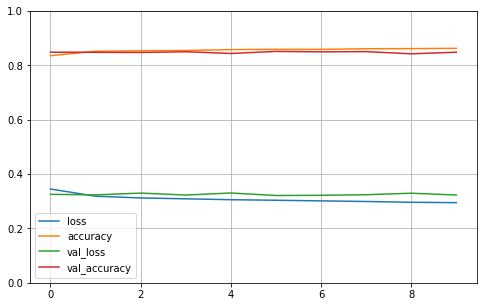

Activation function:  elu 


Epoch 1/10
  6/943 [..............................] - ETA: 9s - loss: 0.7586 - accuracy: 0.4948  

2022-05-24 15:19:23.109020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.3395 - accuracy: 0.8402

2022-05-24 15:19:32.797330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 12s 13ms/step - loss: 0.3395 - accuracy: 0.8402 - val_loss: 0.3308 - val_accuracy: 0.8479
Epoch 2/10
943/943 [==============================] - 12s 12ms/step - loss: 0.3188 - accuracy: 0.8495 - val_loss: 0.3253 - val_accuracy: 0.8474
Epoch 3/10
943/943 [==============================] - 11s 12ms/step - loss: 0.3135 - accuracy: 0.8531 - val_loss: 0.3215 - val_accuracy: 0.8474
Epoch 4/10
943/943 [==============================] - 11s 12ms/step - loss: 0.3109 - accuracy: 0.8549 - val_loss: 0.3217 - val_accuracy: 0.8475
Epoch 5/10
943/943 [==============================] - 11s 12ms/step - loss: 0.3084 - accuracy: 0.8555 - val_loss: 0.3246 - val_accuracy: 0.8482
Epoch 6/10
943/943 [==============================] - 11s 12ms/step - loss: 0.3070 - accuracy: 0.8570 - val_loss: 0.3179 - val_accuracy: 0.8488
Epoch 7/10
943/943 [==============================] - 11s 12ms/step - loss: 0.3046 - accuracy: 0.8593 - val_loss: 0.3247 - val_accuracy: 0.8483
Epo

2022-05-24 15:21:17.596686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.7565737051792829


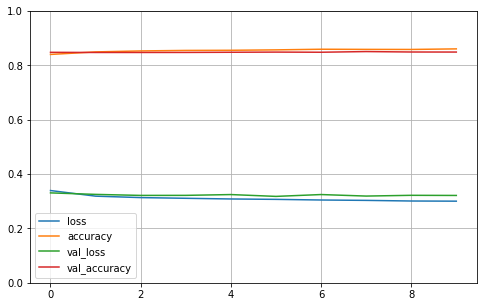

Activation function:  LeakyReLU 


Epoch 1/10
  1/943 [..............................] - ETA: 4:08 - loss: 0.7993 - accuracy: 0.3438

2022-05-24 15:21:19.270511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.3402 - accuracy: 0.8397

2022-05-24 15:21:25.276412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 8ms/step - loss: 0.3402 - accuracy: 0.8397 - val_loss: 0.3282 - val_accuracy: 0.8468
Epoch 2/10
943/943 [==============================] - 7s 8ms/step - loss: 0.3198 - accuracy: 0.8510 - val_loss: 0.3239 - val_accuracy: 0.8491
Epoch 3/10
943/943 [==============================] - 8s 9ms/step - loss: 0.3151 - accuracy: 0.8528 - val_loss: 0.3227 - val_accuracy: 0.8464
Epoch 4/10
943/943 [==============================] - 8s 9ms/step - loss: 0.3124 - accuracy: 0.8545 - val_loss: 0.3209 - val_accuracy: 0.8506
Epoch 5/10
943/943 [==============================] - 8s 9ms/step - loss: 0.3105 - accuracy: 0.8550 - val_loss: 0.3233 - val_accuracy: 0.8490
Epoch 6/10
943/943 [==============================] - 8s 8ms/step - loss: 0.3088 - accuracy: 0.8562 - val_loss: 0.3243 - val_accuracy: 0.8471
Epoch 7/10
943/943 [==============================] - 8s 8ms/step - loss: 0.3079 - accuracy: 0.8573 - val_loss: 0.3222 - val_accuracy: 0.8503
Epoch 8/10
943/94

2022-05-24 15:22:38.300244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.7737715803452855


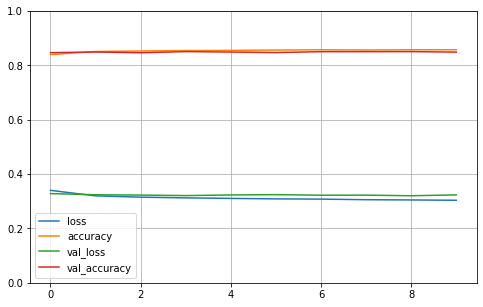

In [13]:
import pandas as pd
from sklearn import  metrics

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

act_fun = ["sigmoid","tanh","relu", "elu","LeakyReLU"]

dfs = []

for activation in act_fun:
    model = Sequential()
    model.add(Dense(100,activation=activation,input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(50,activation=activation))
    model.add(Dense(10,activation=activation))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

    print("Activation function: ",activation,'\n\n')

    history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=10);

    print(metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") ))

    dfs.append(pd.DataFrame(history.history))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Zad. 
Stwórz wykres porównujący metody. 

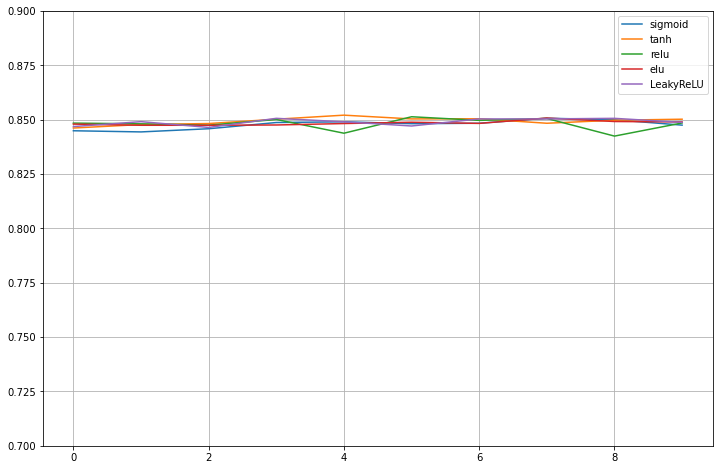

In [16]:
plt.figure(figsize=(12, 8))
dfs.append(pd.DataFrame(history.history['accuracy']))

for df,fun in zip(dfs,act_fun):
    df['val_accuracy'].plot(label = fun)
    plt.grid(True)
    plt.gca().set_ylim(0.7, 0.9)

plt.legend()
plt.show()